In [16]:
import pandas as pd
import joblib
import gpplot
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotnine as gg

from datasets import (GuideDataset,
                      human_designs,
                      tracr_list,
                      dataset_list)
from core import (get_feature_df,
                  setup_plots,
                  lollipop_plot)

In [2]:
setup_plots()

In [3]:
model = joblib.load('../models/RuleSet3.pkl')
train_data_names = pd.read_csv('../data/processed/train_data_names.csv').name.to_list()

deweirdt_kwargs = {'filepath': '../data/processed/DeWeirdt2020_activity.csv',
                   'sgrna_seq_col': 'sgRNA Sequence', 'context_seq_col': 'sgRNA Context Sequence',
                   'rank_col': 'scaled_neg_lfc', 'endogenous': True,
                   'sgrna_group_col': 'Target Gene Symbol', 'cut_perc_col': 'Target Cut %',
                   'design_file': human_designs, 'genomewide': False}

deweirdt_gat_kwargs = {'filepath': '../data/processed/DeWeirdt2020_gattinara_activity.csv',
                       'sgrna_seq_col': 'sgRNA Sequence', 'context_seq_col': 'sgRNA Context Sequence',
                       'rank_col': 'mean_centered_neg_lfc', 'endogenous': True,
                       'sgrna_group_col': 'Target Gene Symbol', 'cut_perc_col': 'Target Cut %',
                       'design_file': human_designs, 'genomewide': True}

sanson_kwargs = {'filepath': '../data/processed/Sanson2018_activity.csv',
                 'sgrna_seq_col': 'sgRNA Sequence', 'context_seq_col': 'sgRNA Context Sequence',
                 'rank_col': 'scaled_neg_lfc', 'endogenous': True,
                 'sgrna_group_col': 'Target Gene Symbol', 'cut_perc_col': 'Target Cut %',
                 'design_file': human_designs, 'genomewide': False}

sanson_bru_kwargs = {'filepath': '../data/processed/Sanson2018_brunello_activity.csv',
                     'sgrna_seq_col': 'sgRNA Sequence', 'context_seq_col': 'sgRNA Context Sequence',
                     'rank_col': 'mean_centered_neg_lfc', 'endogenous': True,
                     'sgrna_group_col': 'Target Gene Symbol', 'cut_perc_col': 'Target Cut %',
                     'design_file': human_designs, 'genomewide': True}

In [4]:
alt_tracr_dataset_list = []
tracr_options = tracr_list
for tracr in tracr_options:
    deweirdt_tracr_kwargs = deweirdt_kwargs.copy()
    deweirdt_tracr_kwargs['tracr'] = tracr
    deweirdt_tracr_kwargs['name'] = 'DeWeirdt2020_Tiling'
    alt_tracr_dataset_list.append(GuideDataset(**deweirdt_tracr_kwargs))
    deweirdt_gat_tracr_kwargs = deweirdt_gat_kwargs.copy()
    deweirdt_gat_tracr_kwargs['tracr'] = tracr
    deweirdt_gat_tracr_kwargs['name'] = 'DeWeirdt2020_Gattinara'
    alt_tracr_dataset_list.append(GuideDataset(**deweirdt_gat_tracr_kwargs))
    sanson_tracr_kwargs = sanson_kwargs.copy()
    sanson_tracr_kwargs['tracr'] = tracr
    sanson_tracr_kwargs['name'] = 'Sanson2018_Tiling'
    alt_tracr_dataset_list.append(GuideDataset(**sanson_tracr_kwargs))
    sanson_bru_tracr_kwargs = sanson_bru_kwargs.copy()
    sanson_bru_tracr_kwargs['tracr'] = tracr
    sanson_bru_tracr_kwargs['name'] = 'Sanson2018_Brunello'
    alt_tracr_dataset_list.append(GuideDataset(**sanson_bru_tracr_kwargs))

In [5]:
dataset_activity_list = []
for ds in alt_tracr_dataset_list:
    ds.load_data()
    dataset_activity = ds.get_sg_df(include_group=True,
                                    include_activity=True)
    dataset_activity['dataset'] = ds.name
    dataset_activity['genomewide'] = ds.genomewide
    dataset_activity['tracr'] = ds.tracr
    dataset_activity_list.append(dataset_activity)
dataset_activity_df = (pd.concat(dataset_activity_list)
                       .reset_index(drop=True))
dataset_activity_df['dataset_name'] = dataset_activity_df['dataset'].replace(
    {'DeWeirdt2020_Tiling': 'DeWeirdt 2020 Tiling sgRNAs\n(DeWeirdt 2020 tracr)',
     'DeWeirdt2020_Gattinara': 'DeWeirdt 2020 Gattinara\n(DeWeirdt 2020 tracr)',
     'Sanson2018_Tiling': 'Sanson 2018 Tiling sgRNAs\n(Sanson 2018 tracr)',
     'Sanson2018_Brunello': 'Sanson 2018 Brunello sgRNAs\n(Sanson 2018 tracr)'})
dataset_activity_df

,sgRNA Sequence,sgRNA Context Sequence,PAM Sequence,sgRNA Target,sgRNA Activity,dataset,genomewide,tracr,dataset_name
0,AAAAAATTATGCTGAATACC,GATTAAAAAATTATGCTGAATACCAGGTAG,AGG,KPNB1,-0.193618,DeWeirdt2020_Tiling,False,Hsu2013,DeWeirdt 2020 Tiling sgRNAs\n(DeWeirdt 2020 tr...
1,AAAACAGGGGCACGAGGGTA,AGGAAAAACAGGGGCACGAGGGTATGGATA,TGG,HNRNPU,-0.203537,DeWeirdt2020_Tiling,False,Hsu2013,DeWeirdt 2020 Tiling sgRNAs\n(DeWeirdt 2020 tr...
2,AAAACCGGCGCTGGAACCAC,GGTCAAAACCGGCGCTGGAACCACGGGACA,GGG,PSMA6,-0.823737,DeWeirdt2020_Tiling,False,Hsu2013,DeWeirdt 2020 Tiling sgRNAs\n(DeWeirdt 2020 tr...
3,AAAACTATCAAGTTGGGATC,CCAAAAAACTATCAAGTTGGGATCAGGCAG,AGG,SF3B1,-0.559045,DeWeirdt2020_Tiling,False,Hsu2013,DeWeirdt 2020 Tiling sgRNAs\n(DeWeirdt 2020 tr...
4,AAAACTCTTGGAGCAATATA,CCCAAAAACTCTTGGAGCAATATAAGGAAG,AGG,HNRNPU,1.277651,DeWeirdt2020_Tiling,False,Hsu2013,DeWeirdt 2020 Tiling sgRNAs\n(DeWeirdt 2020 tr...
...,...,...,...,...,...,...,...,...,...
23689,TTTGTCTCTAGTACTGAACC,GGTCTTTGTCTCTAGTACTGAACCTGGAGA,TGG,GTF2H4,-0.341758,Sanson2018_Brunello,True,Chen2013,Sanson 2018 Brunello sgRNAs\n(Sanson 2018 tracr)
23690,TTTGTCTGCTAGGTCGCCTG,TCTGTTTGTCTGCTAGGTCGCCTGTGGTCA,TGG,RCC1L,0.585367,Sanson2018_Brunello,True,Chen2013,Sanson 2018 Brunello sgRNAs\n(Sanson 2018 tracr)
23691,TTTGTGCAGTTATGCCAGCA,GCAGTTTGTGCAGTTATGCCAGCAGGGACA,GGG,CTCF,1.805987,Sanson2018_Brunello,True,Chen2013,Sanson 2018 Brunello sgRNAs\n(Sanson 2018 tracr)
23692,TTTGTTAGGTCATCGTATTG,GGTTTTTGTTAGGTCATCGTATTGAGGAAG,AGG,RPL4,-0.145556,Sanson2018_Brunello,True,Chen2013,Sanson 2018 Brunello sgRNAs\n(Sanson 2018 tracr)


In [6]:
train_data_list = list()
for ds in dataset_list:
    if ds.name in train_data_names:
        train_data_list.append(ds)

train_data_sgs = set()
for ds in train_data_list:
    ds.load_data()
    ds.set_sgrnas()
    train_data_sgs |= set(ds.sgrnas)

X = get_feature_df(dataset_activity_df)
dataset_activity_df['Rule Set 3'] = model.predict(X)
dataset_activity_df['Rule Set 3 train'] = dataset_activity_df['sgRNA Sequence'].isin(train_data_sgs)

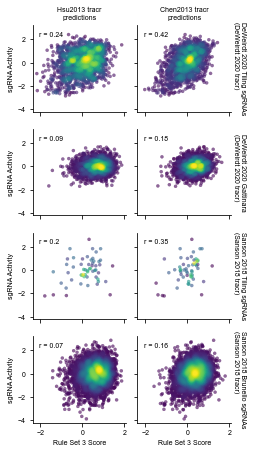

In [8]:
rs3_filtered_activity = dataset_activity_df[~dataset_activity_df['Rule Set 3 train']]
g = sns.FacetGrid(data=rs3_filtered_activity, col='tracr', row='dataset_name', margin_titles=True,
                  height=1.7)
g.map_dataframe(gpplot.point_densityplot, x='Rule Set 3', y='sgRNA Activity',
                s=10)
g.map_dataframe(gpplot.add_correlation, x='Rule Set 3', y='sgRNA Activity',
                color='black', method='spearman')
g.set_titles(col_template="{col_name} tracr\npredictions", row_template="{row_name}")
g.set_axis_labels(x_var='Rule Set 3 Score', y_var='sgRNA Activity')
plt.subplots_adjust(hspace=0.2)
gpplot.savefig('../figures/seq_alt_tracr_rs3_performance.pdf', dpi=300)

In [37]:
rs3_performance_summary = (rs3_filtered_activity.groupby(['dataset', 'tracr'])
                           .apply(lambda df: pd.Series({'size': df.shape[0],
                                                        'Spearman r': stats.spearmanr(df['Rule Set 3'],
                                                                                      df['sgRNA Activity'])[0]}))
                           .reset_index())
rs3_performance_summary['dataset_tracr'] = (rs3_performance_summary['dataset'].str.split('_', expand=True)[0] +
                                            ' tracr sgRNAs')
rs3_performance_summary['dataset_name'] = (rs3_performance_summary['dataset'] +
                                           '\n(n =' + rs3_performance_summary['size'].astype(int).astype(str) + ')')

Saving 1.5 x 2 in image.
Filename: ../figures/seq_alt_tracr_rs3_performance_dot.pdf


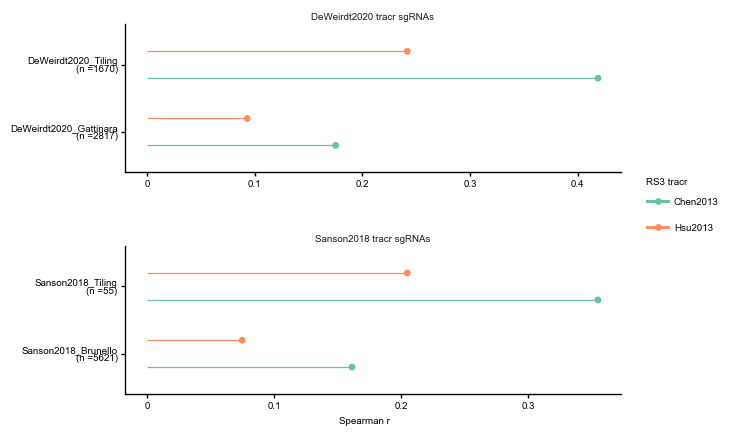

<ggplot: (8767915315941)>

In [38]:
g = (gg.ggplot(rs3_performance_summary) +
     gg.aes(y='Spearman r', ymin=0, ymax='Spearman r',
            x='dataset_name', xend='dataset_name', color='tracr') +
     gg.geom_point(size=4, shape='.', position=gg.position_dodge(width=0.8)) +
     gg.geom_linerange(position=gg.position_dodge(width=0.8)) +
     gg.scale_color_brewer(type='qual', palette='Set2',
                           name='RS3 tracr') +
     gg.xlab('') +  # Flipping before coord flip
     gg.ylab('Spearman r') +
     gg.coord_flip() +
     gg.facet_wrap('dataset_tracr', scales='free', ncol=1) +
     gg.theme(subplots_adjust={'hspace': 0.5}))
g.save('../figures/seq_alt_tracr_rs3_performance_dot.pdf', width=1.5, height=2)
g